In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [8]:
train_images = '/kaggle/input/visual-taxonomy/train_images'
category_attributes = pd.read_parquet('/kaggle/input/visual-taxonomy/category_attributes.parquet')
data = pd.read_csv('/kaggle/input/visual-taxonomy/train.csv') 

data['image_path'] = data['id'].apply(lambda x: os.path.join(train_images, f"{str(x).zfill(6)}.jpg"))
data = data.drop(['id'], axis=1)

Men_Tshirts = data[data['Category']=='Men Tshirts'].drop(['Category', 'len', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10'], axis=1).reset_index(drop=True)
Sarees = data[data['Category']=='Sarees'].drop(['Category', 'len'], axis=1).reset_index(drop=True)
Kurtis = data[data['Category']=='Kurtis'].drop(['Category', 'len', 'attr_10'], axis=1).reset_index(drop=True)
Women_Tshirts = data[data['Category']=='Women Tshirts'].drop(['Category', 'len', 'attr_9', 'attr_10'], axis=1).reset_index(drop=True)
Womens_Tops = data[data['Category']=='Women Tops & Tunics'].drop(['Category', 'len'], axis=1).reset_index(drop=True)

In [17]:
Men_Tshirts.head()

attr_1 attr_2   attr_3   attr_4         attr_5  \
0     default  round  printed  default  short sleeves   
1  multicolor   polo    solid    solid  short sleeves   
2     default   polo    solid    solid  short sleeves   
3  multicolor   polo    solid    solid  short sleeves   
4  multicolor   polo    solid    solid  short sleeves   

                                          image_path  
0  /kaggle/input/visual-taxonomy/train_images/000...  
1  /kaggle/input/visual-taxonomy/train_images/000...  
2  /kaggle/input/visual-taxonomy/train_images/000...  
3  /kaggle/input/visual-taxonomy/train_images/000...  
4  /kaggle/input/visual-taxonomy/train_images/000...

In [11]:
Sarees.head()

attr_1        attr_2        attr_3      attr_4       attr_5  \
0  same as saree  woven design  small border  multicolor        party   
1            NaN          zari  small border       cream  traditional   
2            NaN          zari  small border       white        party   
3  same as saree  woven design    big border     default  traditional   
4          solid     no border           NaN         NaN        daily   

     attr_6         attr_7      attr_8        attr_9 attr_10  \
0  jacquard   woven design  zari woven      applique      no   
1       NaN            NaN  zari woven      elephant      no   
2       NaN            NaN  zari woven        floral      no   
3       NaN  same as saree  zari woven  ethnic motif      no   
4       NaN            NaN         NaN           NaN     yes   

                                          image_path  
0  /kaggle/input/visual-taxonomy/train_images/007...  
1  /kaggle/input/visual-taxonomy/train_images/007...  
2  /kaggle/input/visual-taxonomy/train_images/007...  
3  /kaggle/input/visual-taxonomy/train_images/007...  
4  /kaggle/input/visual-taxonomy/train_images/007...

In [12]:
Kurtis.head()

attr_1    attr_2       attr_3 attr_4   attr_5   attr_6   attr_7  \
0      black  straight  knee length  daily      net    solid    solid   
1        red  straight  knee length  daily  default  default  default   
2        red  straight  knee length  daily  default  default  default   
3  navy blue  straight  knee length  daily  default  default  default   
4      black  straight  knee length  daily  default  default  default   

                  attr_8   attr_9  \
0  three-quarter sleeves  regular   
1  three-quarter sleeves  regular   
2  three-quarter sleeves  regular   
3  three-quarter sleeves  regular   
4  three-quarter sleeves  regular   

                                          image_path  
0  /kaggle/input/visual-taxonomy/train_images/025...  
1  /kaggle/input/visual-taxonomy/train_images/025...  
2  /kaggle/input/visual-taxonomy/train_images/025...  
3  /kaggle/input/visual-taxonomy/train_images/025...  
4  /kaggle/input/visual-taxonomy/train_images/025...

In [13]:
Women_Tshirts.head()

attr_1 attr_2 attr_3   attr_4   attr_5        attr_6           attr_7  \
0  multicolor  loose   long  default  default       default  regular sleeves   
1      yellow  loose   long  default  default  long sleeves  regular sleeves   
2  multicolor  loose   long  default  default       default  regular sleeves   
3  multicolor  loose   long  default  default  long sleeves  regular sleeves   
4  multicolor  loose   long  default  default       default  regular sleeves   

  attr_8                                         image_path  
0    NaN  /kaggle/input/visual-taxonomy/train_images/032...  
1    NaN  /kaggle/input/visual-taxonomy/train_images/032...  
2    NaN  /kaggle/input/visual-taxonomy/train_images/032...  
3    NaN  /kaggle/input/visual-taxonomy/train_images/032...  
4    NaN  /kaggle/input/visual-taxonomy/train_images/032...

In [15]:
Womens_Tops.head()

attr_1   attr_2   attr_3      attr_4  attr_5   attr_6      attr_7  \
0      black  regular      NaN         NaN     NaN      NaN         NaN   
1  navy blue   fitted     crop        high  casual  default       solid   
2        red  regular  regular  round neck  casual  printed  typography   
3    default   fitted     crop    stylised  casual    solid       solid   
4    default     boxy  regular  round neck  casual  printed  typography   

          attr_8           attr_9  attr_10  \
0            NaN  regular sleeves      NaN   
1  short sleeves          default  knitted   
2     sleeveless       sleeveless      NaN   
3  short sleeves  regular sleeves  default   
4  short sleeves          default      NaN   

                                          image_path  
0  /kaggle/input/visual-taxonomy/train_images/051...  
1  /kaggle/input/visual-taxonomy/train_images/051...  
2  /kaggle/input/visual-taxonomy/train_images/051...  
3  /kaggle/input/visual-taxonomy/train_images/051...  
4  /kaggle/input/visual-taxonomy/train_images/051...

In [22]:
def perform_eda(df):
    # Null Values Analysis
    print("No. of Null values:")
    print(df.isnull().sum())
    
    # Set up categorical columns excluding the 'image_path' column
    cols = df.drop(['image_path'], axis=1).columns
    
    # Plotting distributions for each categorical column
    num_cols = 5
    num_rows = (len(cols) + num_cols - 1) // num_cols  
    plt.figure(figsize=(15, 5 * num_rows))  
    for i, col in enumerate(cols, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Display sample images with categorical labels
    sample_images = df.sample(3)  
    plt.figure(figsize=(15, 10))
    for i, row in enumerate(sample_images.iterrows()):
        img_path = row[1]['image_path']
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        title = ',\n '.join([f"{col}: {row[1][col]}" for col in cols])
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

No. of Null values:
attr_1        1257
attr_2        1123
attr_3        1476
attr_4        1318
attr_5        1290
image_path       0
dtype: int64


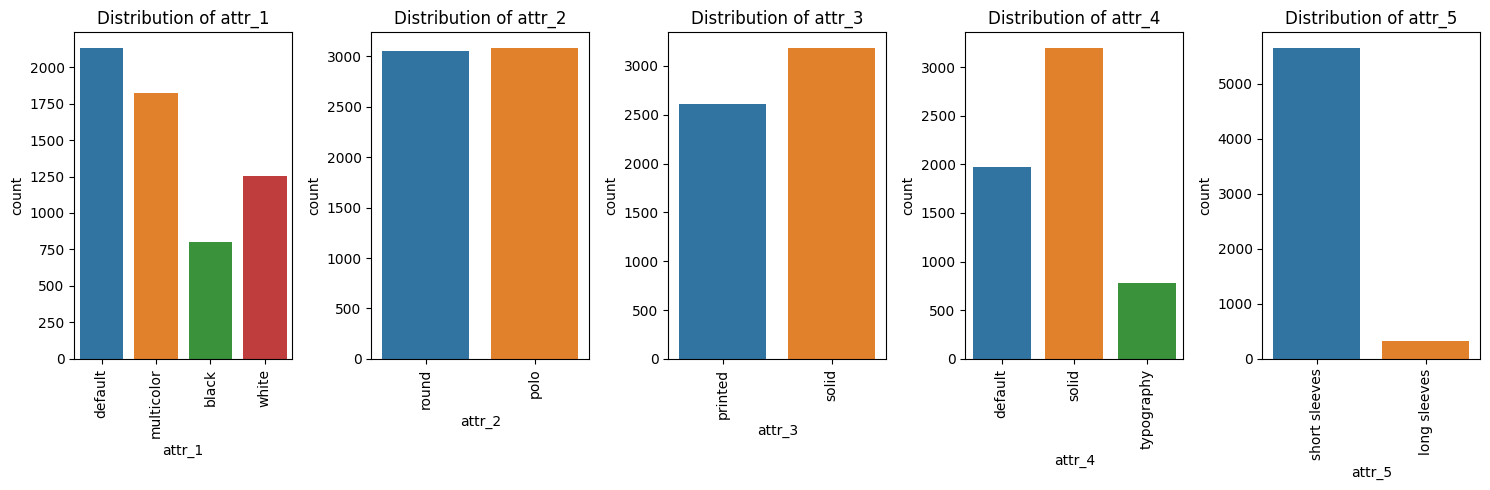

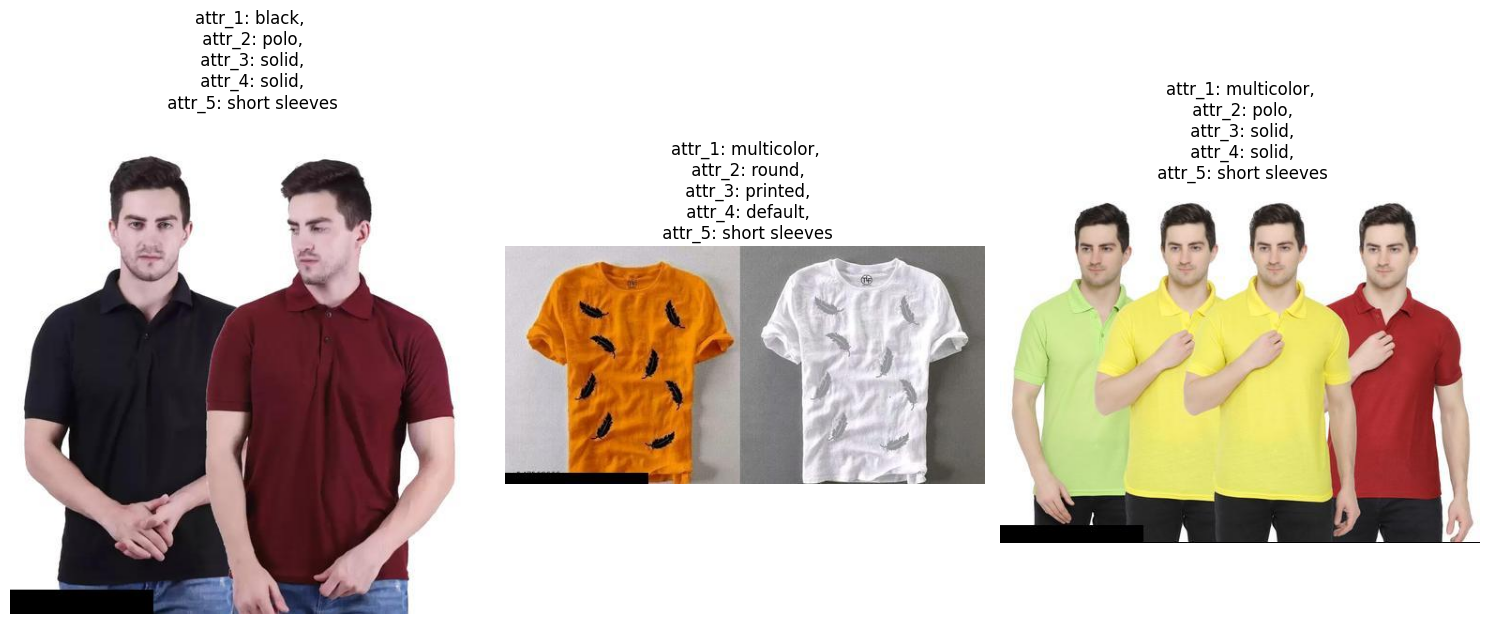

In [23]:
perform_eda(Men_Tshirts)

No. of Null values:
attr_1        10461
attr_2          667
attr_3         2485
attr_4          450
attr_5          697
attr_6        13336
attr_7         9450
attr_8         1881
attr_9         4043
attr_10         528
image_path        0
dtype: int64


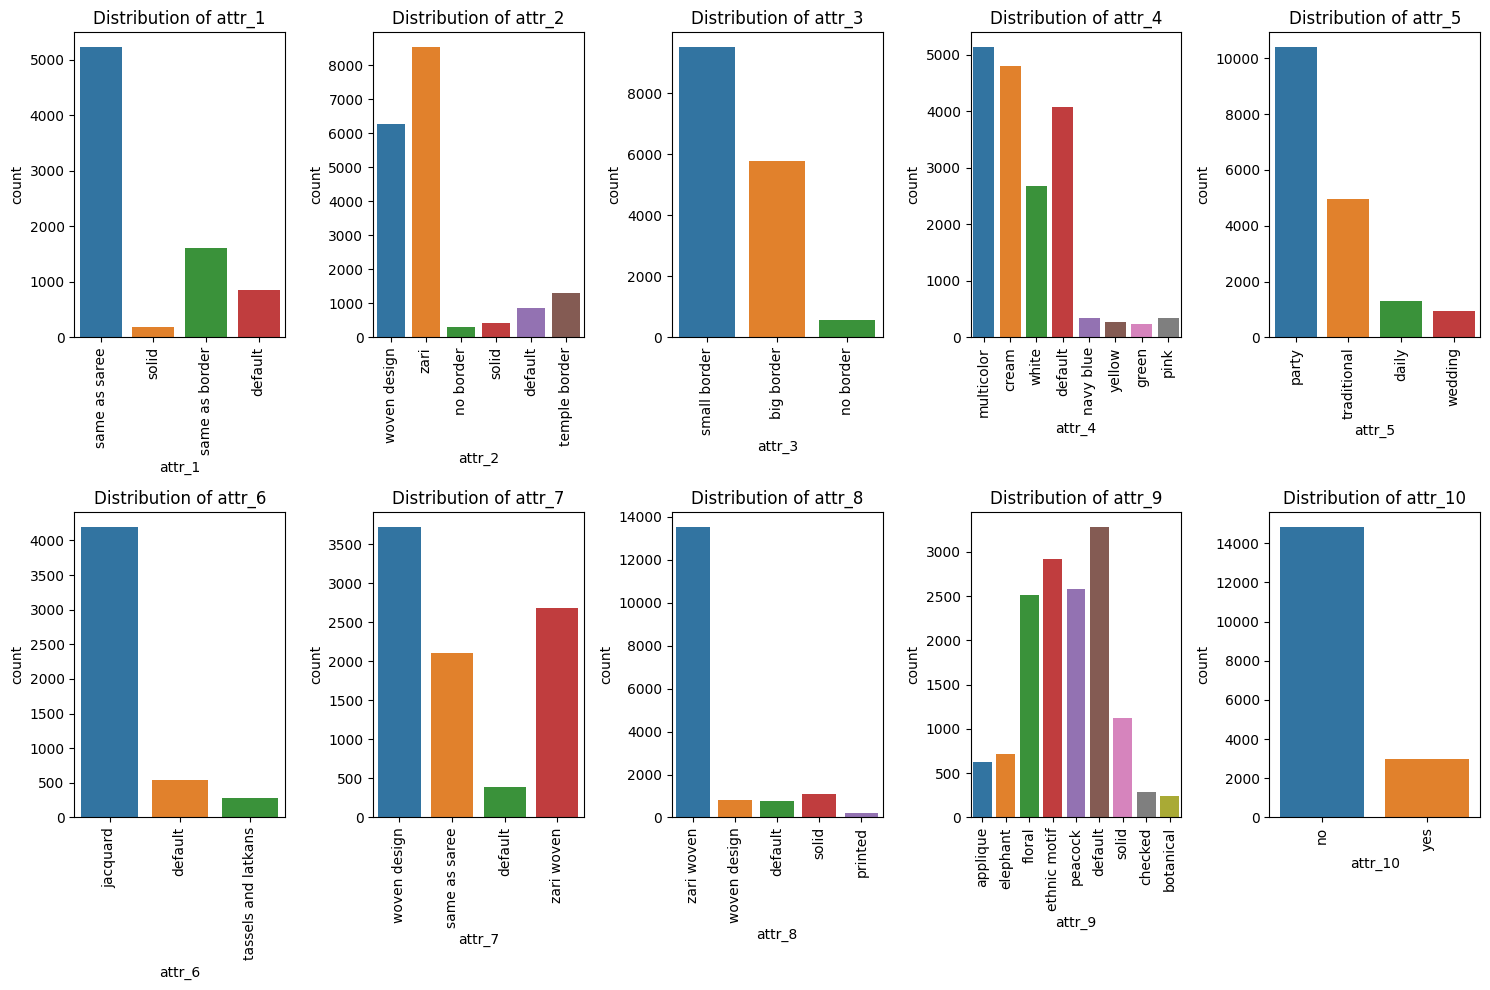

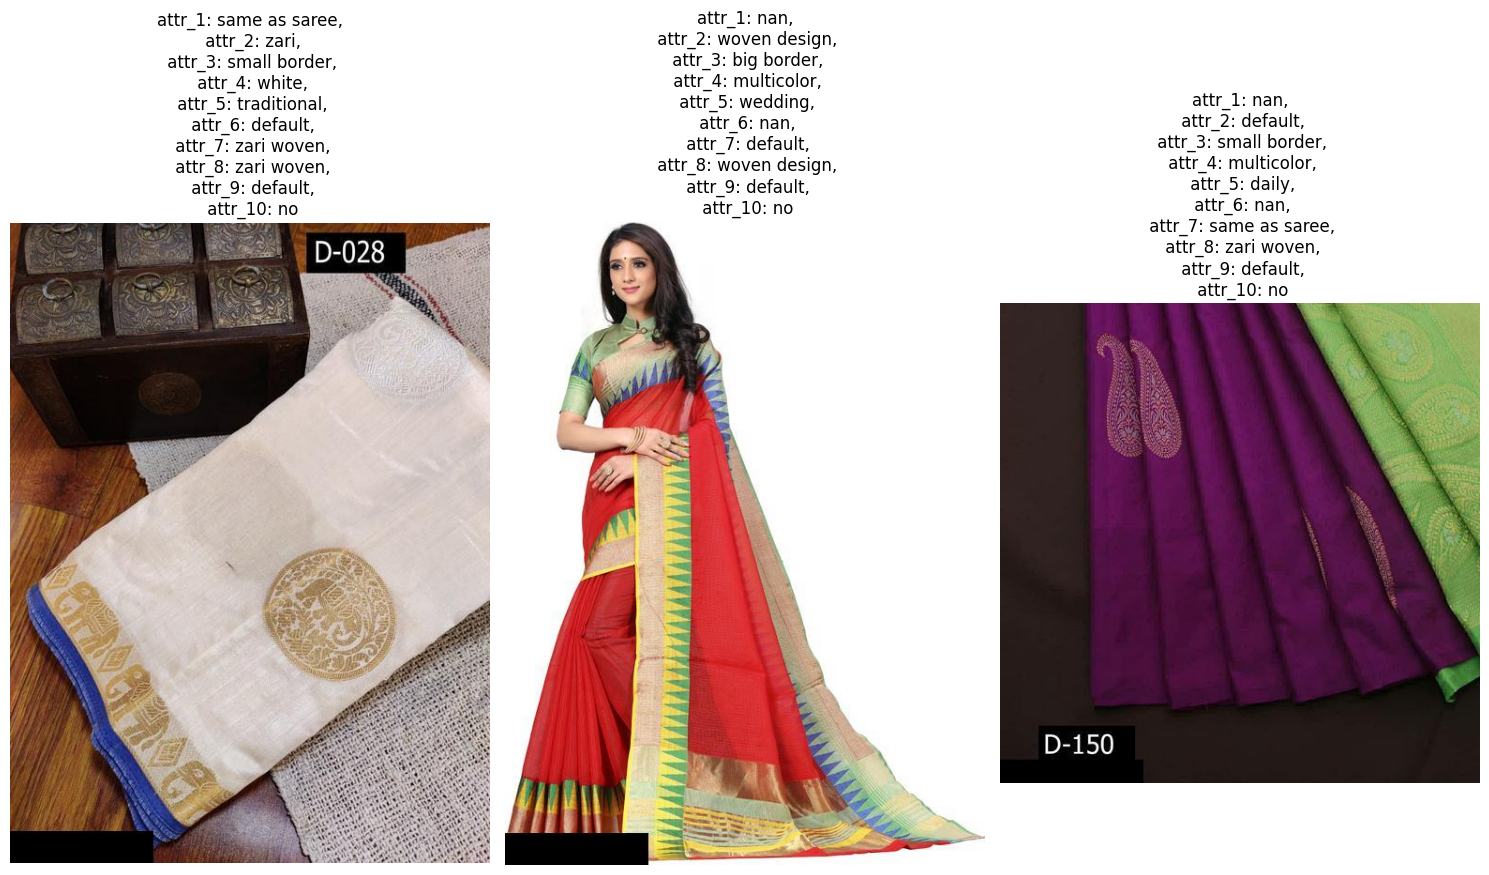

In [24]:
perform_eda(Sarees)

No. of Null values:
attr_1         193
attr_2        3591
attr_3        3422
attr_4         391
attr_5        3556
attr_6        2974
attr_7        2979
attr_8         120
attr_9         131
image_path       0
dtype: int64


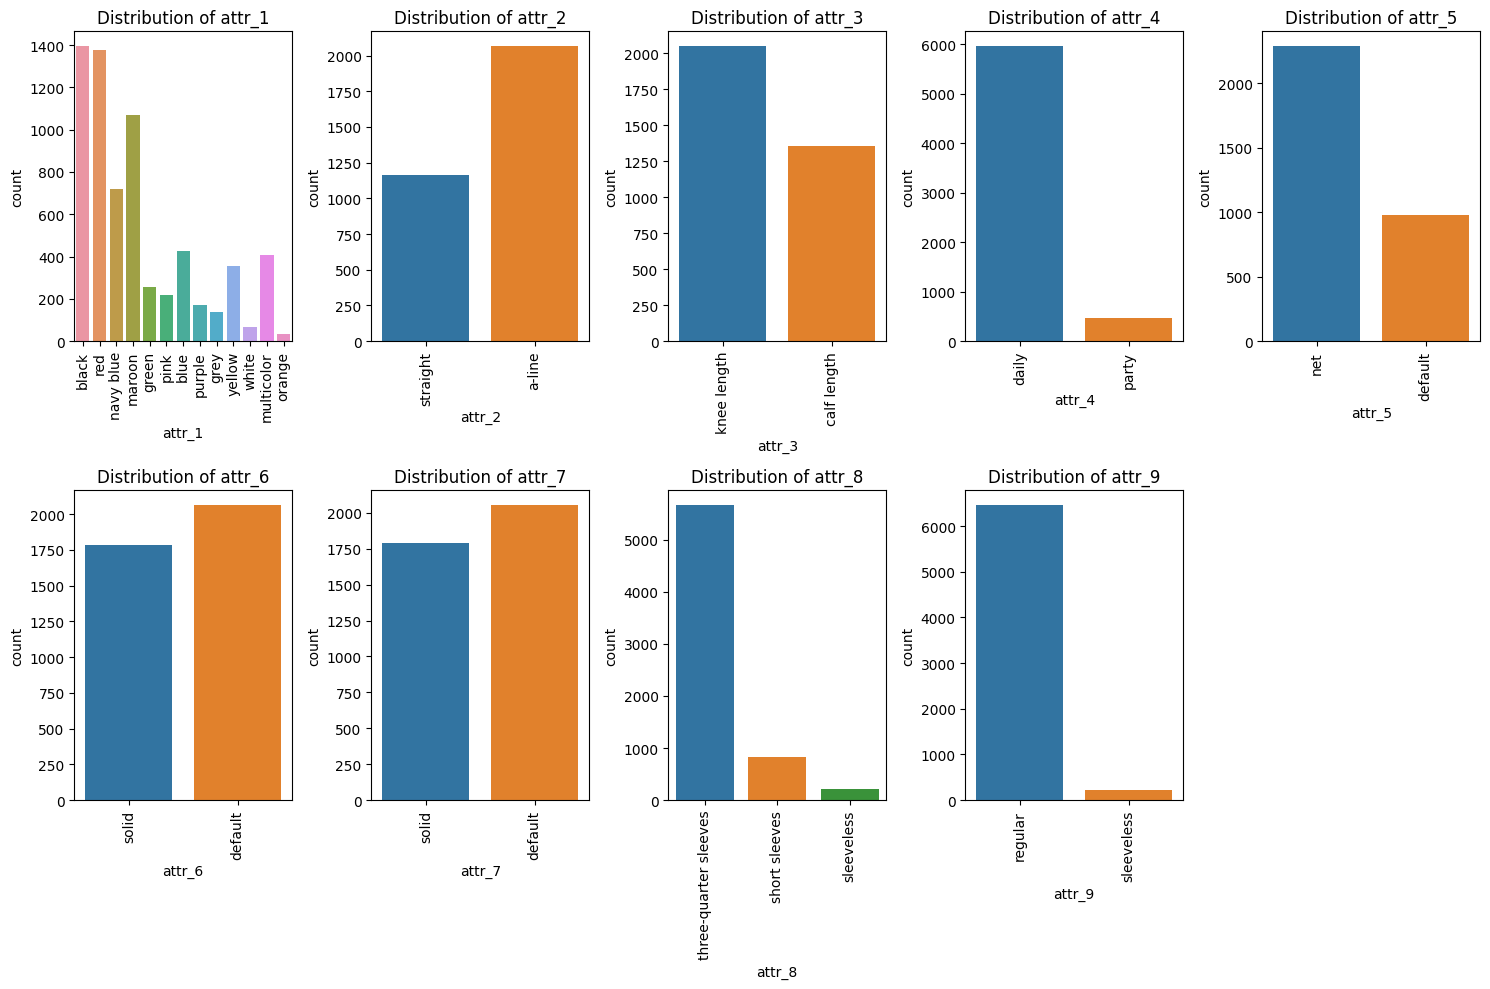

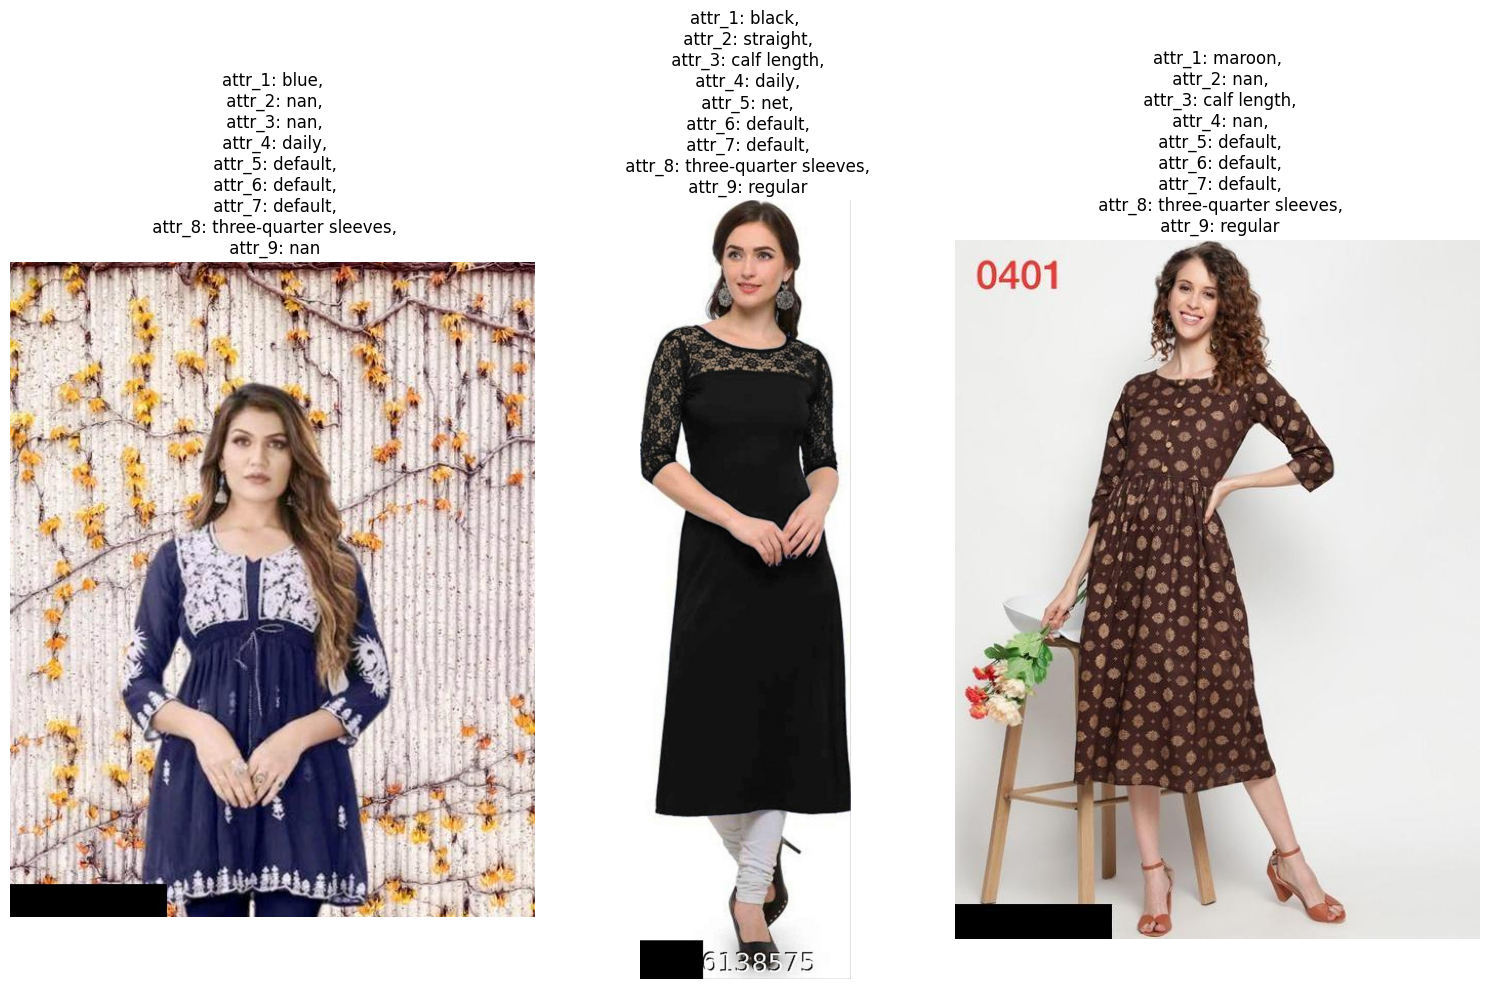

In [25]:
perform_eda(Kurtis)

No. of Null values:
attr_1         1489
attr_2         3973
attr_3         2194
attr_4         2613
attr_5         1740
attr_6         2733
attr_7         3314
attr_8        18264
image_path        0
dtype: int64


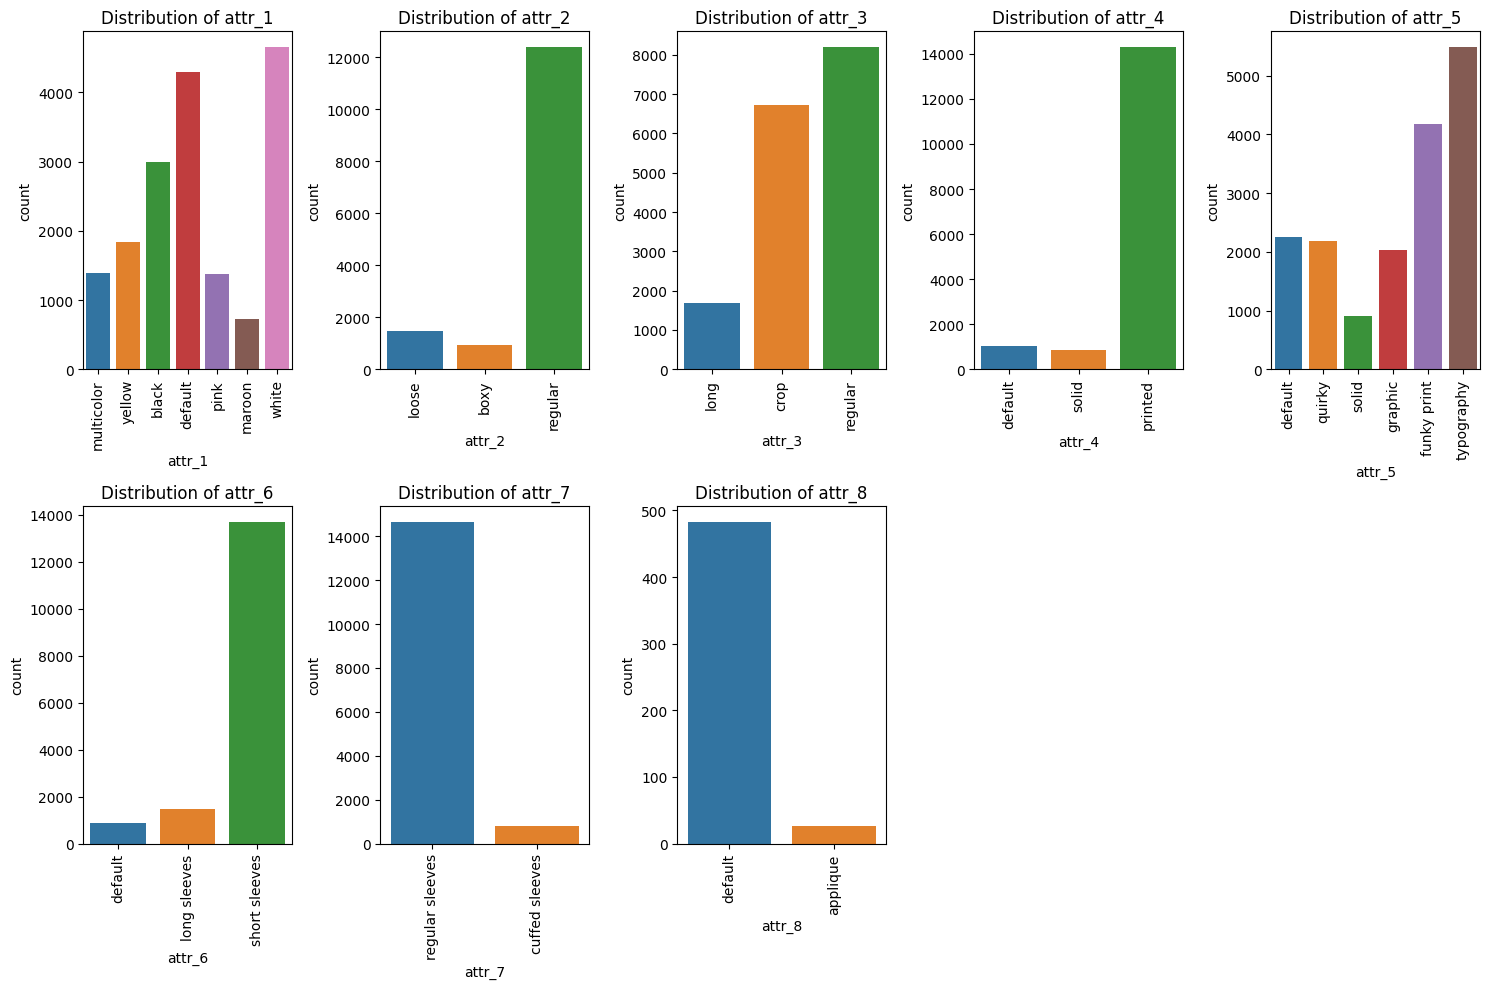

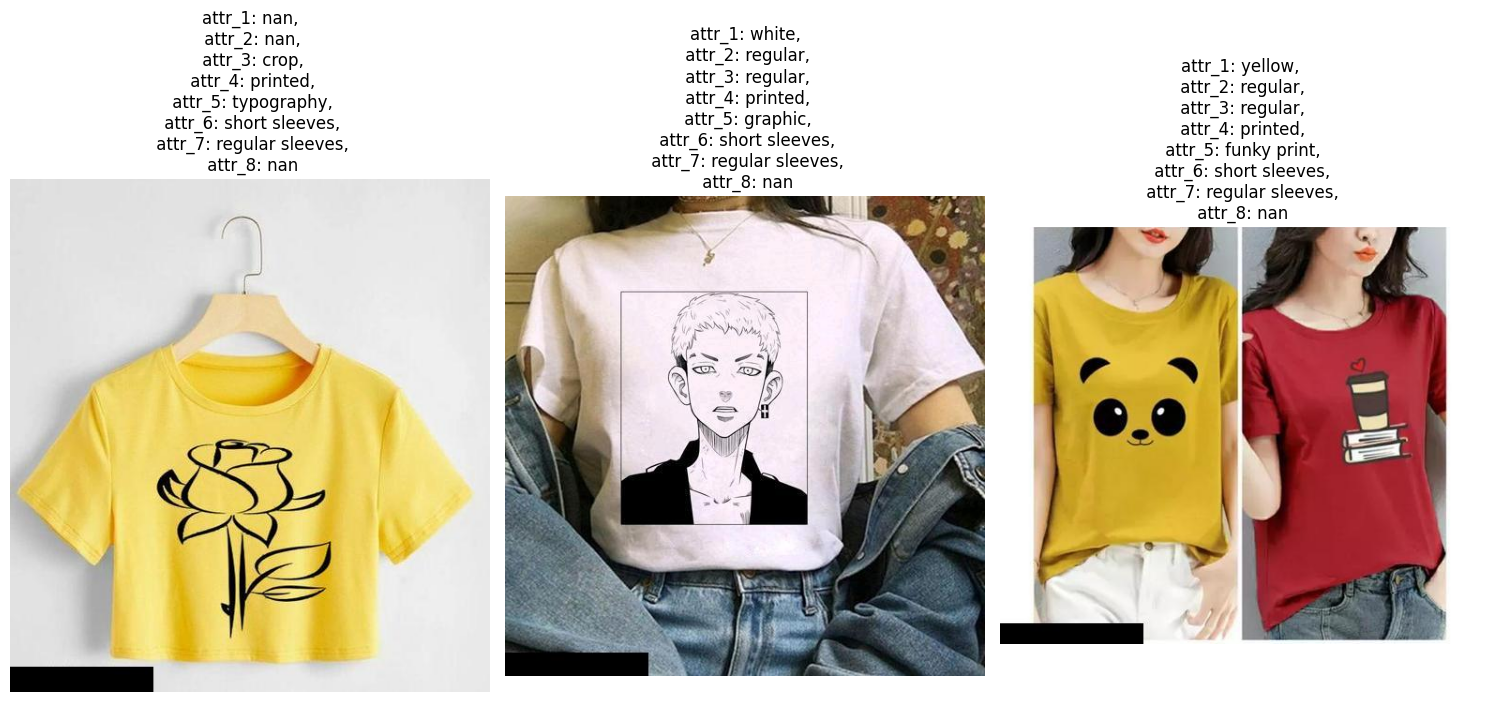

In [26]:
perform_eda(Women_Tshirts)

No. of Null values:
attr_1         4946
attr_2         5667
attr_3         5938
attr_4         5553
attr_5         6437
attr_6         5787
attr_7         5788
attr_8         5207
attr_9         6433
attr_10       11823
image_path        0
dtype: int64


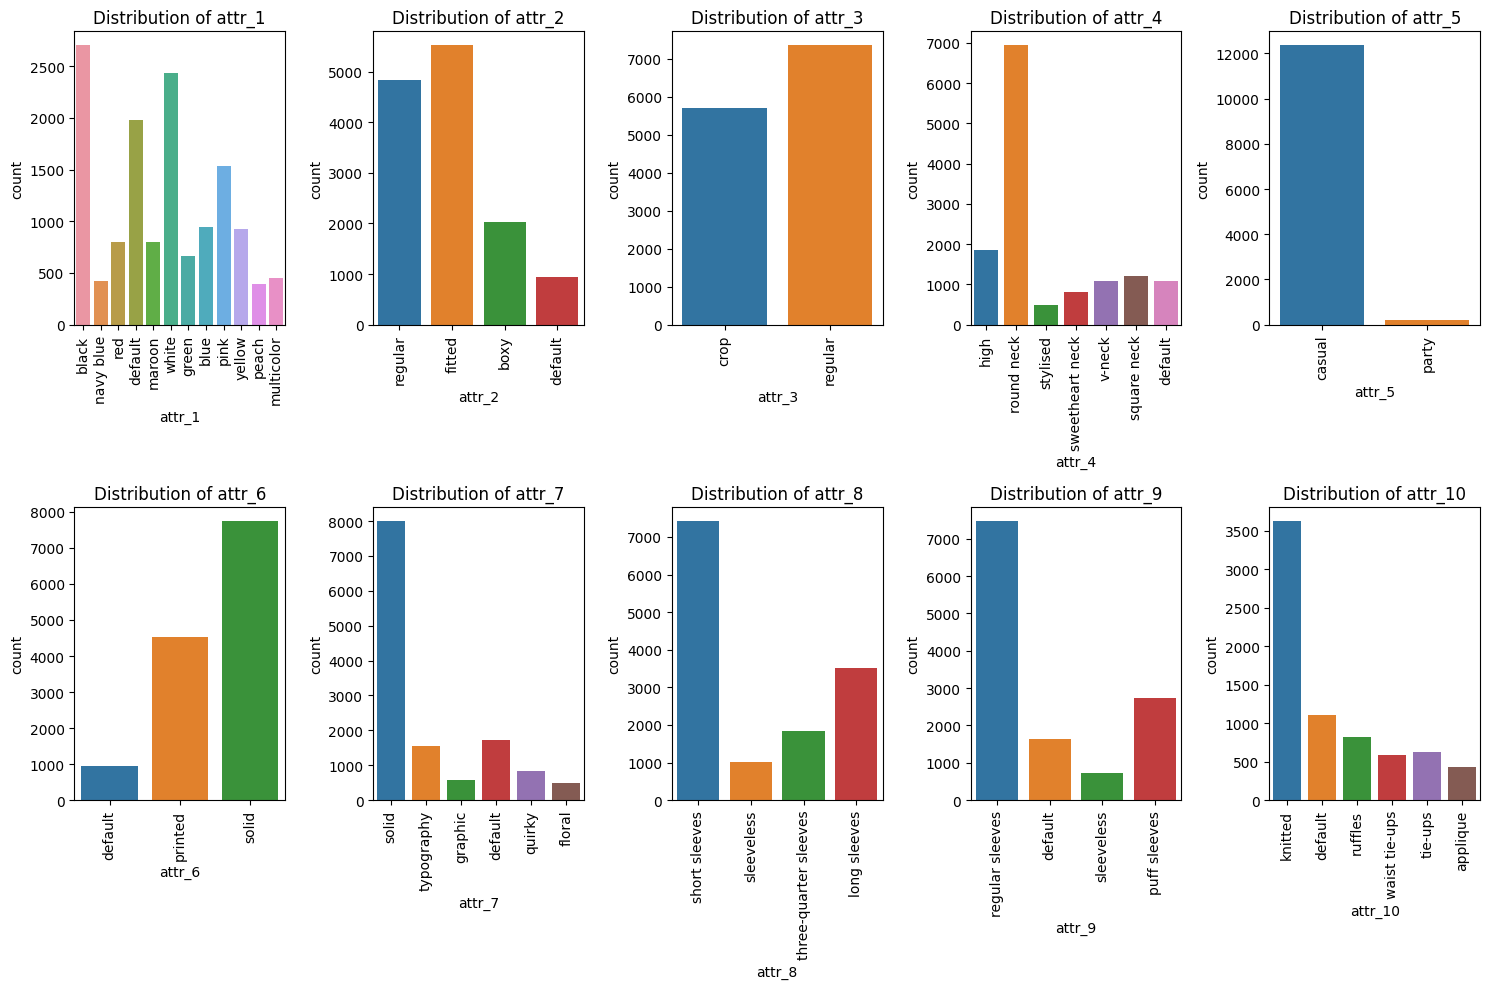

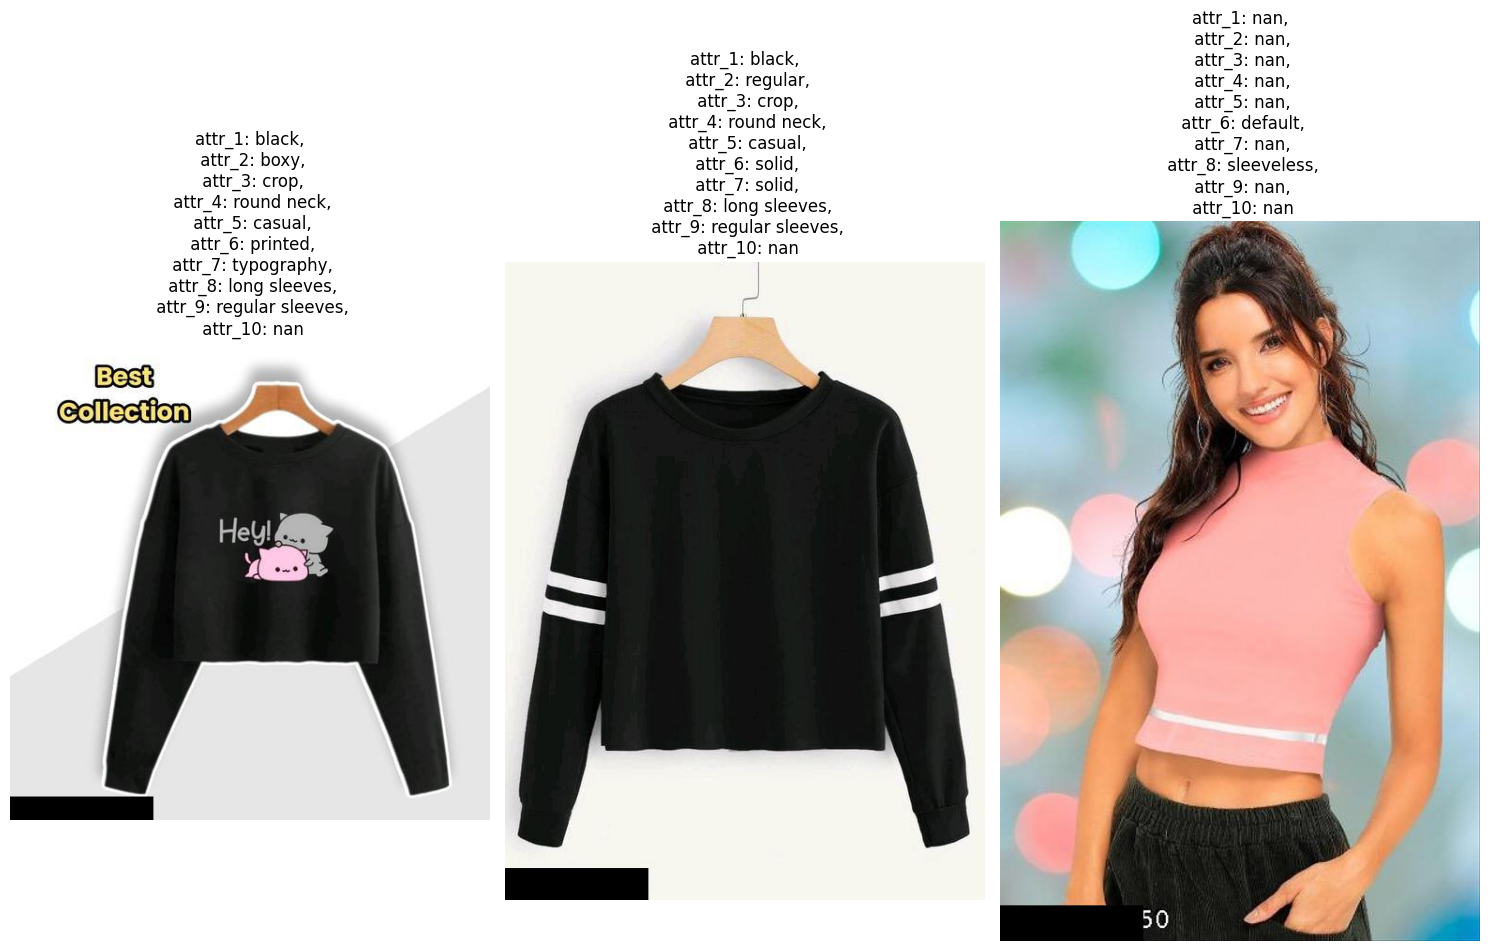

In [27]:
perform_eda(Womens_Tops)